In [7]:
import pandas as pd

def readCSV(file):
    df=pd.read_csv(file, header=None, names=["chain","chain_len","duration_in_seconds"])
    df.drop(df.tail(1).index,inplace=True) # drop last n rows
    df["duration"]=df["duration_in_seconds"]*1000
    return df

#df1=readCSV("microservices_analysis/results-1.csv")
df64=readCSV("microservices_analysis/results-64.csv")
df1k=readCSV("microservices_analysis/results-1k.csv")
df10k=readCSV("microservices_analysis/results-10k.csv")

df64dk=readCSV("microservices_analysis/results-64-dk.csv")
df1kdk=readCSV("microservices_analysis/results-1k-dk.csv")
df10kdk=readCSV("microservices_analysis/results-10k-dk.csv")

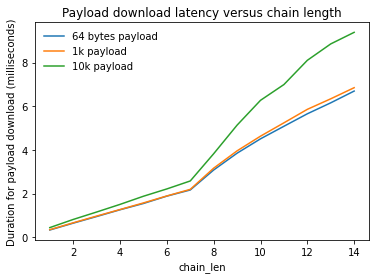

In [34]:

ax=df64.groupby(by="chain_len").duration.mean().plot()
ax.set_title("Payload download latency versus chain length")
ax.set_xlabel("Chain Length (microservices hops)")
ax.set_ylabel("Duration for payload download (milliseconds)")
df1k.groupby(by="chain_len").duration.mean().plot()
df10k.groupby(by="chain_len").duration.mean().plot(legend="true")
ax.legend(['64 bytes payload', '1k payload','10k payload'], loc='upper left', frameon=False)


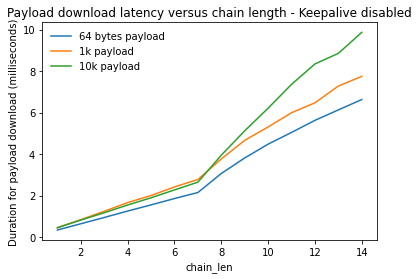

In [36]:

ax=df64dk.groupby(by="chain_len").duration.mean().plot()
ax.set_title("Payload download latency versus chain length - Keepalive disabled")
ax.set_xlabel("Chain Length (microservices hops)")
ax.set_ylabel("Duration for payload download (milliseconds)")
df1kdk.groupby(by="chain_len").duration.mean().plot()
df10kdk.groupby(by="chain_len").duration.mean().plot(legend="true")
ax.legend(['64 bytes payload', '1k payload','10k payload'], loc='upper left', frameon=False)



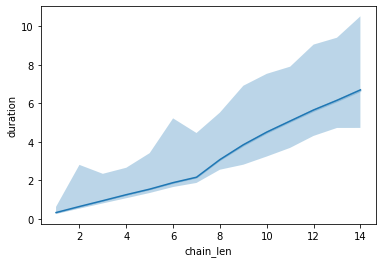

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

lower_bound = df64.groupby(by="chain_len").min().duration
upper_bound = df64.groupby(by="chain_len").max().duration

df=df64.groupby(by="chain_len").median()

#ax=sns.lineplot(data=df,, err_style="bars")
ax=sns.lineplot(data=df64,  x="chain_len", y="duration")
#ax.errorbar(df64.index, mean, yerr=std, fmt='-o') 


ax.fill_between(df.index, lower_bound, upper_bound, alpha=.3)

In [11]:
lower_bound

chain_len
1.0     0.260
2.0     0.538
3.0     0.809
4.0     1.078
5.0     1.349
6.0     1.659
7.0     1.872
8.0     2.557
9.0     2.817
10.0    3.241
11.0    3.690
12.0    4.310
13.0    4.723
14.0    4.725
Name: duration, dtype: float64

Text(0, 0.5, 'Duration (RTT) milliseconds')

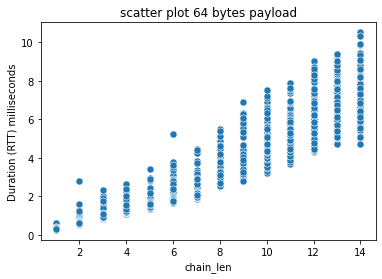

In [35]:
ax=sns.scatterplot(data=df64,  x="chain_len", y="duration",  s=50)
ax.set_title("scatter plot 64 bytes payload")
ax.set_ylabel("Duration (RTT) milliseconds")

In [21]:
df.duration.min()

0.331

In [23]:
df.duration.max()

6.635

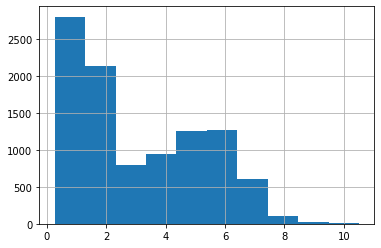

In [20]:
df64.duration.hist()

In [33]:
dx=(df64dk.duration-df64.duration)/df64dk.duration*100
df.median()

duration_in_seconds    0.002582
duration               2.582000
dtype: float64